In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import sklearn.metrics as metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Imputer
from sklearn.metrics import mean_squared_error
from datetime import datetime
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn import ensemble
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn import svm
import itertools;
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from itertools import product
from collections import OrderedDict   
from sklearn.tree import export_graphviz
from IPython.display import Image
from IPython.display import display
from matplotlib import colors
import seaborn as sns

%matplotlib inline

sns.set_context("poster")

/Users/kate_zym/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [12]:
df = pd.read_csv('Data/dataAll_csv8_withMM.csv')
df.shape

(5006, 3251)

In [13]:
### READING DATA

df["slope_class"] = 0
df["slope_class"][df['ref_slope'] < 0] = -1
df["slope_class"][df['ref_slope'] == 0]= 0
df["slope_class"][df['ref_slope'] > 0]= 1
df = df.drop("ref_speed", axis=1)
df.head()




/Users/kate_zym/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/kate_zym/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/kate_zym/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,subject_number,time_0,time_2,time_4,time_6,time_8,time_10,time_12,time_14,time_16,...,feature_L_H_90,feature_L_H_92,feature_L_H_94,feature_L_H_96,feature_L_H_98,feature_L_H_100,subHeight,subWeight,ref_slope,slope_class
0,1,70039.0,70070.0,70114.0,70153.0,70194.0,70214.0,70233.0,70258.0,70284.0,...,4.69,4.69,4.69,4.69,4.69,4.69,168,59,-10,-1
1,1,71249.0,71273.0,71303.0,71333.0,71358.0,71393.0,71418.0,71442.0,71477.0,...,5.59,5.59,5.59,5.59,5.59,5.59,168,59,-10,-1
2,1,72503.0,72527.0,72551.0,72576.0,72600.0,72624.0,72648.0,72672.0,72697.0,...,4.44,4.44,4.44,4.44,4.44,4.44,168,59,-10,-1
3,1,73714.0,73738.0,73762.0,73786.0,73810.0,73834.0,73858.0,73882.0,73906.0,...,3.39,3.39,3.39,3.39,3.39,3.39,168,59,-10,-1
4,1,74913.0,74938.0,74963.0,74988.0,75012.0,75037.0,75062.0,75087.0,75112.0,...,5.10,5.10,5.10,5.10,5.10,5.10,168,59,-10,-1


In [14]:
# Train/Test set split for Leave One Subject Out Cross Validation

subject_test = 6;

df_train = df[df['subject_number'] != subject_test]
df_test = df[df['subject_number'] ==subject_test]

df_train.shape, df_test.shape

((4196, 3251), (810, 3251))

In [15]:
# Cleaning data: 

# y_train (3 classes) : uphill / flat / downhill 
# y_train_multi (7 classes) : -10%/ -5% / 0% / 5% / 10% / 15%/ 20%

X_train = df_train.iloc[:, :-2]
y_train = df_train.iloc[:, -1]
y_train_multi = df_train.iloc[:, -2]

X_test = df_test.iloc[:, :-2]
y_test = df_test.iloc[:, -1]
y_test_multi = df_test.iloc[:, -2]


### Remove unnecessary predictors (Time, Angle Z, Accerelation X and Y)

for i in range(df_train.shape[1]):
    if df_train.columns[i] == 'timeGaitExt_L_0':
        break
        
index_unused_features = i



a = 52
X_train = df_train[df_train.columns[a:a+54]].copy()
X_test = df_test[df_test.columns[a:a+54]].copy()
a += 107

while a < index_unused_features:
    
    if not ((df_train.columns[a].split('_')[0] == 'angleZ') or (df_train.columns[a].split('_')[0] == 'accXRot') or (df_train.columns[a].split('_')[0] == 'accYRot')):
        X_train = pd.concat([X_train, df_train[df_train.columns[a:a+54]]], axis =1)
        X_test = pd.concat([X_test, df_test[df_test.columns[a:a+54]]], axis =1)

    a += 107
    
# subject Height, Weight
X_train = pd.concat([X_train, df_train[df_train.columns[-4:-2]]], axis =1)
X_test = pd.concat([X_test, df_test[df_test.columns[-4:-2]]], axis =1)

# subject number
X_train = pd.concat([X_train, df_train[df_train.columns[0]]], axis =1)
X_test = pd.concat([X_test, df_test[df_test.columns[0]]], axis =1)

print("Number of predictors we have: %d" %X_train.shape[1])

Number of predictors we have: 975


In [16]:
### Predictor list checking (In case the TF wants to check it)

for j in range(len(X_train.columns)):
    print(X_train.columns[j])

angleX_R_0
angleX_R_2
angleX_R_4
angleX_R_6
angleX_R_8
angleX_R_10
angleX_R_12
angleX_R_14
angleX_R_16
angleX_R_18
angleX_R_20
angleX_R_22
angleX_R_24
angleX_R_26
angleX_R_28
angleX_R_30
angleX_R_32
angleX_R_34
angleX_R_36
angleX_R_38
angleX_R_40
angleX_R_42
angleX_R_44
angleX_R_46
angleX_R_48
angleX_R_50
angleX_R_52
angleX_R_54
angleX_R_56
angleX_R_58
angleX_R_60
angleX_R_62
angleX_R_64
angleX_R_66
angleX_R_68
angleX_R_70
angleX_R_72
angleX_R_74
angleX_R_76
angleX_R_78
angleX_R_80
angleX_R_82
angleX_R_84
angleX_R_86
angleX_R_88
angleX_R_90
angleX_R_92
angleX_R_94
angleX_R_96
angleX_R_98
angleX_R_100
angleX_R_max
angleX_R_min
angleX_R_mean
angleY_R_0
angleY_R_2
angleY_R_4
angleY_R_6
angleY_R_8
angleY_R_10
angleY_R_12
angleY_R_14
angleY_R_16
angleY_R_18
angleY_R_20
angleY_R_22
angleY_R_24
angleY_R_26
angleY_R_28
angleY_R_30
angleY_R_32
angleY_R_34
angleY_R_36
angleY_R_38
angleY_R_40
angleY_R_42
angleY_R_44
angleY_R_46
angleY_R_48
angleY_R_50
angleY_R_52
angleY_R_54
angleY_R_56
angleY_R_

In [6]:
# standardize data
def standardize(x, x_ref):
    mean = np.mean(x_ref);
    std = np.std(x_ref);  

    x_stand = (x - mean)/std;
    return x_stand

X_train_unstand = X_train.copy();
X_train_std = standardize(X_train, X_train_unstand)

X_test_unstand = X_test.copy();
X_test_std = standardize(X_test, X_train_unstand)

In [17]:
np.random.seed(9001)

df_downhill = df[df['ref_slope'] < 0]
df_flat = df[df['ref_slope'] == 0]
df_uphill = df[df['ref_slope'] > 0]

msk1 = np.random.rand(len(df_downhill)) < 1000 /len(df_downhill)
msk2 = np.random.rand(len(df_flat)) < 1000 /len(df_flat)
msk3 = np.random.rand(len(df_uphill)) < 1000 /len(df_uphill)

df_downhill = df_downhill[msk1]
df_flat = df_flat[msk2]
df_uphill = df_uphill[msk3]


downhill_stand = standardize(df_downhill, df_downhill)
flat_stand = standardize(df_flat, df_flat)
uphill_stand = standardize(df_uphill, df_uphill)


df.shape, df_downhill.shape, df_flat.shape, df_uphill.shape, downhill_stand.shape

((5006, 3251), (991, 3251), (859, 3251), (966, 3251), (991, 3251))

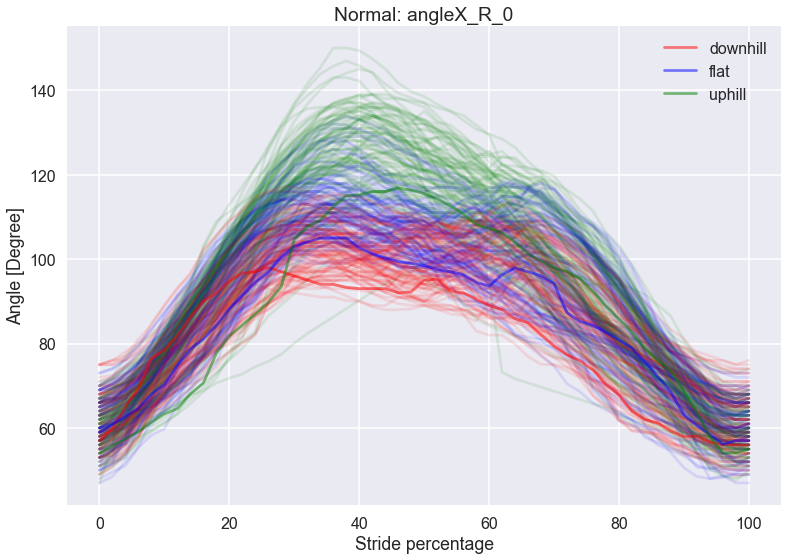

In [25]:
sns.set_context("poster")

a = 52

for i in range(100):
    plt.plot(np.arange(0, 102, 2), np.array(df_downhill.iloc[8*i, a : a+51]), 'r', alpha = 0.1)
    plt.plot(np.arange(0, 102, 2), np.array(df_flat.iloc[8*i, a : a+51]), 'b', alpha = 0.1)
    plt.plot(np.arange(0, 102, 2), np.array(df_uphill.iloc[8*i, a : a+51]), 'g', alpha = 0.1)
    

plt.plot(np.arange(0, 102, 2), np.array(df_downhill.iloc[i+1, a : a+51]), 'r', alpha = 0.5, label = 'downhill')
plt.plot(np.arange(0, 102, 2), np.array(df_flat.iloc[i+1, a : a+51]), 'b', alpha = 0.5, label = 'flat')
plt.plot(np.arange(0, 102, 2), np.array(df_uphill.iloc[i+1, a : a+51]), 'g', alpha = 0.5, label = 'uphill')
    
plt.legend()
plt.title("Normal: "+ str(df.columns[a]))
plt.xlabel("Stride percentage")
plt.ylabel("Angle [Degree]")

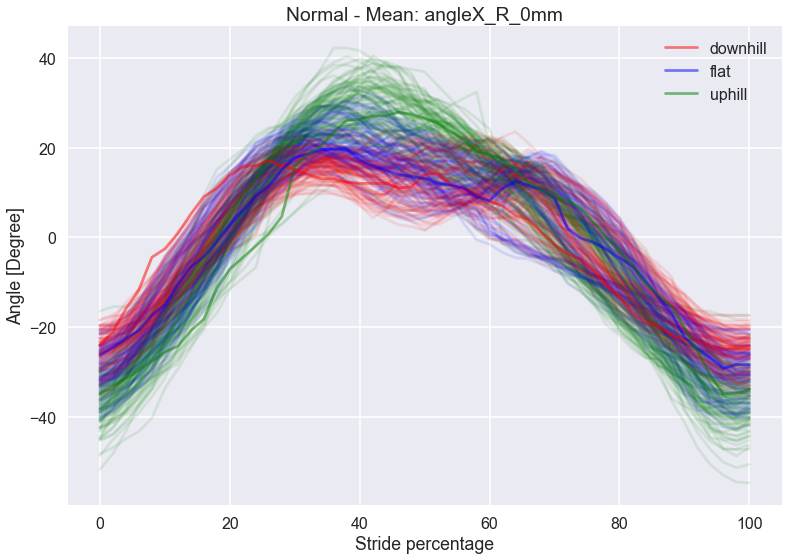

In [26]:
sns.set_context("poster")

a = 52+54

for i in range(100):
    plt.plot(np.arange(0, 102, 2), np.array(df_downhill.iloc[8*i, a : a+51]), 'r', alpha = 0.1)
    plt.plot(np.arange(0, 102, 2), np.array(df_flat.iloc[8*i, a : a+51]), 'b', alpha = 0.1)
    plt.plot(np.arange(0, 102, 2), np.array(df_uphill.iloc[8*i, a : a+51]), 'g', alpha = 0.1)
    

plt.plot(np.arange(0, 102, 2), np.array(df_downhill.iloc[i+1, a : a+51]), 'r', alpha = 0.5, label = 'downhill')
plt.plot(np.arange(0, 102, 2), np.array(df_flat.iloc[i+1, a : a+51]), 'b', alpha = 0.5, label = 'flat')
plt.plot(np.arange(0, 102, 2), np.array(df_uphill.iloc[i+1, a : a+51]), 'g', alpha = 0.5, label = 'uphill')
    
plt.legend()
plt.title("Normal - Mean: "+ str(df.columns[a]))
plt.xlabel("Stride percentage")
plt.ylabel("Angle [Degree]")

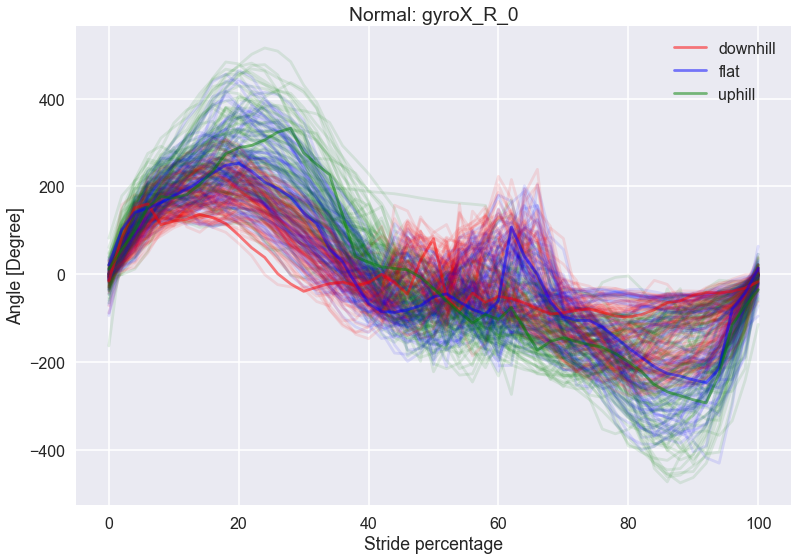

In [30]:
sns.set_context("poster")

a = 52+107 + 107 + 107

for i in range(100):
    plt.plot(np.arange(0, 102, 2), np.array(df_downhill.iloc[8*i, a : a+51]), 'r', alpha = 0.1)
    plt.plot(np.arange(0, 102, 2), np.array(df_flat.iloc[8*i, a : a+51]), 'b', alpha = 0.1)
    plt.plot(np.arange(0, 102, 2), np.array(df_uphill.iloc[8*i, a : a+51]), 'g', alpha = 0.1)
    

plt.plot(np.arange(0, 102, 2), np.array(df_downhill.iloc[i+1, a : a+51]), 'r', alpha = 0.5, label = 'downhill')
plt.plot(np.arange(0, 102, 2), np.array(df_flat.iloc[i+1, a : a+51]), 'b', alpha = 0.5, label = 'flat')
plt.plot(np.arange(0, 102, 2), np.array(df_uphill.iloc[i+1, a : a+51]), 'g', alpha = 0.5, label = 'uphill')
    
plt.legend()
plt.title("Normal: "+ str(df.columns[a]))
plt.xlabel("Stride percentage")
plt.ylabel("Angle [Degree]")

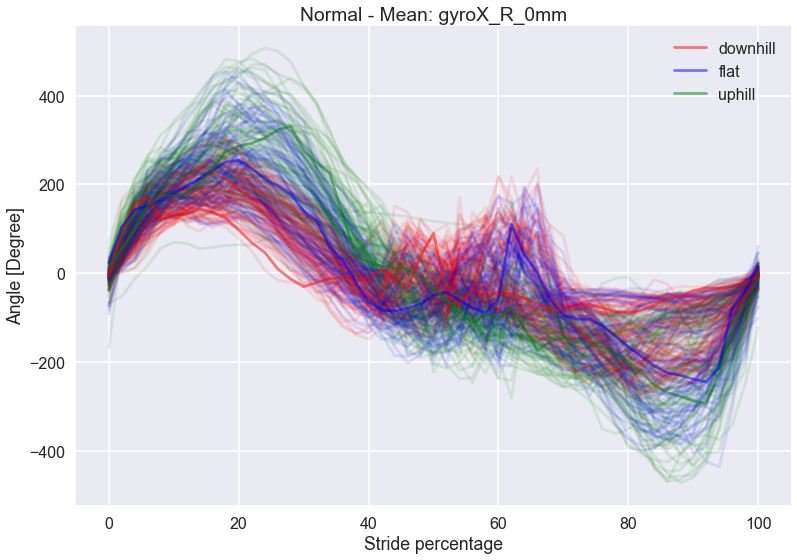

In [32]:
sns.set_context("poster")

a = 52+54+107+ 107+ 107

for i in range(100):
    plt.plot(np.arange(0, 102, 2), np.array(df_downhill.iloc[8*i, a : a+51]), 'r', alpha = 0.1)
    plt.plot(np.arange(0, 102, 2), np.array(df_flat.iloc[8*i, a : a+51]), 'b', alpha = 0.1)
    plt.plot(np.arange(0, 102, 2), np.array(df_uphill.iloc[8*i, a : a+51]), 'g', alpha = 0.1)
    

plt.plot(np.arange(0, 102, 2), np.array(df_downhill.iloc[i+1, a : a+51]), 'r', alpha = 0.5, label = 'downhill')
plt.plot(np.arange(0, 102, 2), np.array(df_flat.iloc[i+1, a : a+51]), 'b', alpha = 0.5, label = 'flat')
plt.plot(np.arange(0, 102, 2), np.array(df_uphill.iloc[i+1, a : a+51]), 'g', alpha = 0.5, label = 'uphill')
    
plt.legend()
plt.title("Normal - Mean: "+ str(df.columns[a]))
plt.xlabel("Stride percentage")
plt.ylabel("Angle [Degree]")

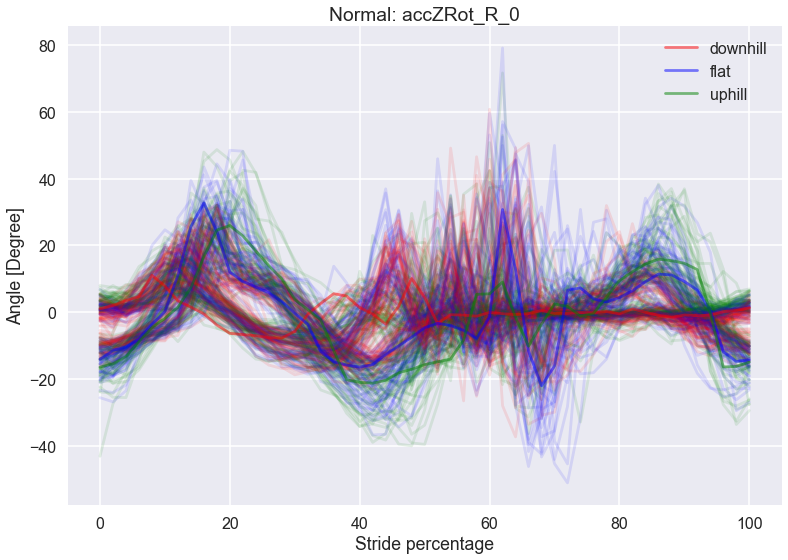

In [33]:
sns.set_context("poster")

a = 52+107 + 107 + 107 + 107*5

for i in range(100):
    plt.plot(np.arange(0, 102, 2), np.array(df_downhill.iloc[8*i, a : a+51]), 'r', alpha = 0.1)
    plt.plot(np.arange(0, 102, 2), np.array(df_flat.iloc[8*i, a : a+51]), 'b', alpha = 0.1)
    plt.plot(np.arange(0, 102, 2), np.array(df_uphill.iloc[8*i, a : a+51]), 'g', alpha = 0.1)
    

plt.plot(np.arange(0, 102, 2), np.array(df_downhill.iloc[i+1, a : a+51]), 'r', alpha = 0.5, label = 'downhill')
plt.plot(np.arange(0, 102, 2), np.array(df_flat.iloc[i+1, a : a+51]), 'b', alpha = 0.5, label = 'flat')
plt.plot(np.arange(0, 102, 2), np.array(df_uphill.iloc[i+1, a : a+51]), 'g', alpha = 0.5, label = 'uphill')
    
plt.legend()
plt.title("Normal: "+ str(df.columns[a]))
plt.xlabel("Stride percentage")
plt.ylabel("Angle [Degree]")

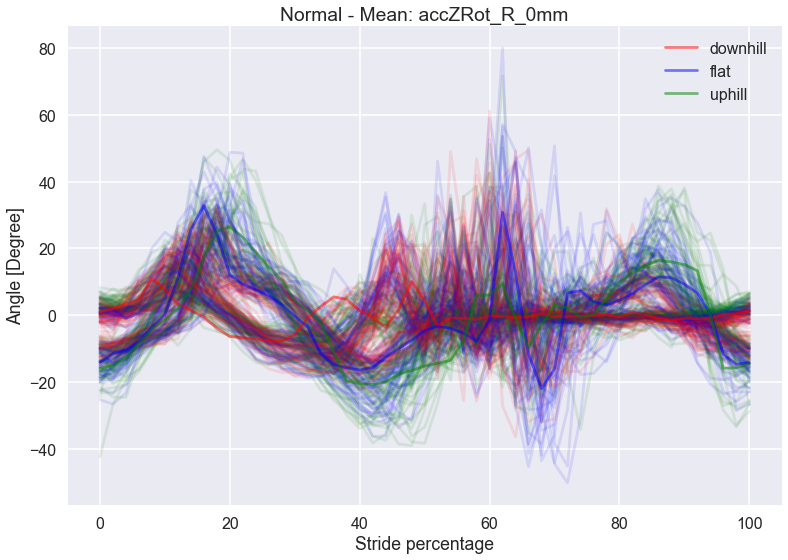

In [34]:
sns.set_context("poster")

a = 52+54+107+107+ 107 + 107*5

for i in range(100):
    plt.plot(np.arange(0, 102, 2), np.array(df_downhill.iloc[8*i, a : a+51]), 'r', alpha = 0.1)
    plt.plot(np.arange(0, 102, 2), np.array(df_flat.iloc[8*i, a : a+51]), 'b', alpha = 0.1)
    plt.plot(np.arange(0, 102, 2), np.array(df_uphill.iloc[8*i, a : a+51]), 'g', alpha = 0.1)
    

plt.plot(np.arange(0, 102, 2), np.array(df_downhill.iloc[i+1, a : a+51]), 'r', alpha = 0.5, label = 'downhill')
plt.plot(np.arange(0, 102, 2), np.array(df_flat.iloc[i+1, a : a+51]), 'b', alpha = 0.5, label = 'flat')
plt.plot(np.arange(0, 102, 2), np.array(df_uphill.iloc[i+1, a : a+51]), 'g', alpha = 0.5, label = 'uphill')
    
plt.legend()
plt.title("Normal - Mean: "+ str(df.columns[a]))
plt.xlabel("Stride percentage")
plt.ylabel("Angle [Degree]")

NameError: name 'df_flat' is not defined